# US09 US10 US11 - Matemática Computacional

## Introdução

A US09 tem como objetivo estudar o consumo de água nos parques geridos pelo cliente de forma a possibilitar a gestão eficiente de recursos. Os dados são representados utilizado diferentes métodos de visualização como gráficos de barras, histogramas e tabelas, e são carregados utilizando um ficheiro CSV que regista o consumo diário de água para cada parque.

Na US10, o GSM faz o acompanhamento da utilização de equipamentos no parque, através de diária monitorazação dos equipamentos que são utilizadas pelos visitantes, através do registo, à saída do parque, num dispositivo eletrónico.

Com o registo das escolhas dos utilizadores em relação aos equipamentos utilizados, podem ser analisadas as preferências dos visitantes, o que permite melhorar a experiência dos mesmos na utilização do parque. Esta análise dos dados vai ser efetuada de forma clara e informativa, através de um gráfico circualr que representará, em percentagem, o uso de cada equipamento.

Através desta análise estatística será possível uma gestão mais eficiente dos recursos do parque, direcionando os investimentos e manutenção para as áreas que são mais utilizadas pelos visitantes.

Relativamente à US11, para melhor compreender como pessoas de diferentes faixas etárias utilizam o parque, o Gestor de Espaços Verdes pretende, a partir do portal do utilizador, recolher informações sobre a utilização do parque. Desta forma ao portal do utilizador foi adicionado um inquérito com as três perguntas seguintes:

Pergunta 1) Faixa Etária: 1 - Criança (até aos 15 anos); 2 - Adulto (entre os 16 e os 65 anos); 3 - Sénior (mais de 65 anos)

Pergunta 2) Recomendaria o parque a outras pessoas? (S/N)

Pergunta 3) Com que frequência visita o parque por mês? (Numérico)

Com os dados recolhidos iremos responder a estas 3 perguntas:

11.1 – Indicar o tipo de cada uma das três variáveis.

11.2 – Indicar a proporção de utilizadores de cada faixa etária que recomendaria o parque a outras pessoas.

11.3 – Criar um boxplot para cada faixa etária, relativo à frequência mensal de utilização do parque, e tirar as principais conclusões obtidas a partir deste tipo de gráfico.


## Código e resultados US09

### Consumo de água mensal

Cálculo do consumo de água mensal para um intervalo de datas introduzido pelo utilizador. Os dados são representados utilizando um gráfico de barras contendo no eixo X os meses e no eixo Y o consumo de água em metros cúbicos.


Enter park identification: Cidade
Enter start year: 2023
Enter start month (1-12): 1
Enter end year: 2023
Enter end month (1-12): 12


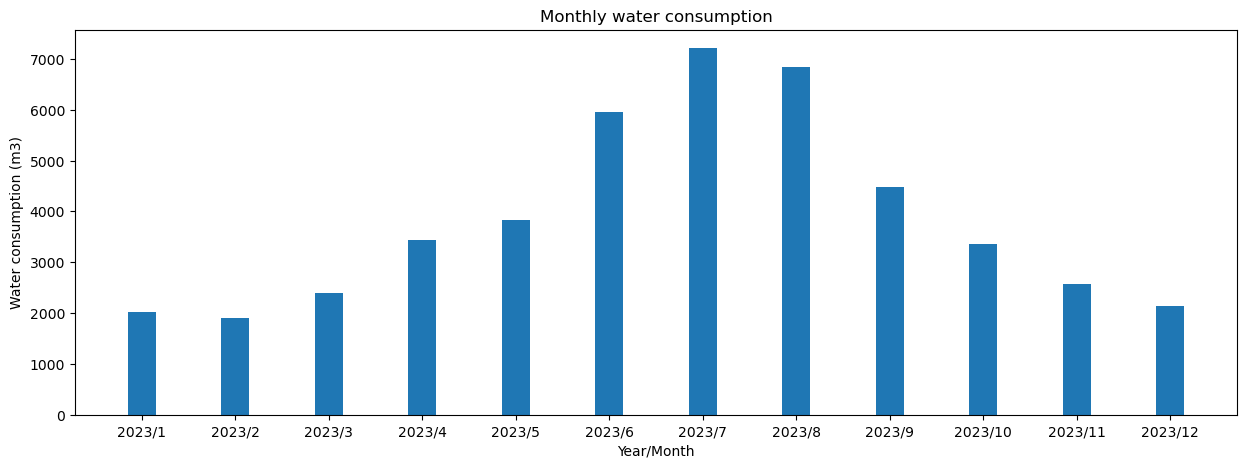

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Create dataframe from CSV
# ==================================================
dataframe = pd.read_csv('water_consumption.csv', sep=';', decimal=',')

# Request user input
# ==================================================
park_id = input('Enter park identification: ')
start_year = int(input('Enter start year: '))
start_month = int(input('Enter start month (1-12): '))
end_year = int(input('Enter end year: '))
end_month = int(input('Enter end month (1-12): '))

# Filter dataframe using user input
# ==================================================
dataframe = dataframe[dataframe['Park'] == park_id]
dataframe = dataframe[dataframe['Year'] >= start_year]
dataframe = dataframe[dataframe['Month'] >= start_month]
dataframe = dataframe[dataframe['Year'] <= end_year]
dataframe = dataframe[dataframe['Month'] <= end_month]

# Get water consumption by year-month
# ==================================================
grouped_by_year_month = {}
for i, row in dataframe.iterrows():
    year_month = str(row['Year']) + '/' + str(row['Month'])
    if year_month not in grouped_by_year_month:
        grouped_by_year_month[year_month] = 0.0

    grouped_by_year_month[year_month] += float(row['Consumption'])

# Plot water consumption
# ==================================================
plt.figure(figsize=(15, 5))
plt.title('Monthly water consumption')
plt.xlabel('Year/Month')
plt.ylabel('Water consumption (m3)')
plt.bar(
    list(grouped_by_year_month.keys()),
    list(grouped_by_year_month.values()),
    align='center',
    width=0.3
)
plt.show()

### Média do consumo de água mensal

Cálculo da média mensal de consumo de água para um ou mais parques introduzidos pelo utilizador.

**Fórmulas utilizadas**:

<u>Média aritmética (Dados não classificados)</u><br>
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In [2]:
import pandas as pd
import statistics as st


WATER_COST = 0.7
WATER_EXTRA_FEE_FROM = 1000
WATER_EXTRA_FEE_VALUE = 1.15


# Create dataframe from CSV
# ==================================================
dataframe = pd.read_csv('water_consumption.csv', sep=';', decimal=',')

# Request user input
# ==================================================
chosen_parks = []
requesting_parks = True

while requesting_parks:
    park_id = input('Enter park identification or leave blank to continue: ')
    if park_id.strip() == "":    
        requesting_parks = False
    elif park_id in chosen_parks:
        pass
    else:
        chosen_parks.append(park_id)
   
print()
print(str(len(chosen_parks)) + ' parks selected: ' + ', '.join(chosen_parks))
print()

print('Average of monthly water consumption costs:')
for parkid in chosen_parks:
    park_dataframe = dataframe[dataframe['Park'] == parkid]

    # Get monthly water comsuption (m3)
    monthly_comsuption = {}
    for i, row in park_dataframe.iterrows():
        year_month = str(row['Year']) + '/' + str(row['Month'])
        if year_month not in monthly_comsuption:
            monthly_comsuption[year_month] = 0.0
        monthly_comsuption[year_month] += float(row['Consumption'])

    # Calc monthly water costs from water comsuption
    monthly_costs = {}
    for year_month, comsuption_m3 in monthly_comsuption.items():
        if comsuption_m3 > WATER_EXTRA_FEE_FROM:
            extra_cost = comsuption_m3 - WATER_EXTRA_FEE_FROM
            extra_cost = extra_cost * WATER_COST
            extra_cost = extra_cost * WATER_EXTRA_FEE_VALUE
            monthly_costs[year_month] = (WATER_EXTRA_FEE_FROM * WATER_COST) + extra_cost
        else:
            monthly_costs[year_month] = comsuption_m3 * WATER_COST

    mean = st.mean(monthly_costs.values())
    print(f' - {parkid}: {mean:.4f} EUR')

Enter park identification or leave blank to continue: Cidade
Enter park identification or leave blank to continue: 

1 parks selected: Cidade

Average of monthly water consumption costs:
 - Cidade: 2739.6397 EUR


### Comparação entre os parques com o dia de maior e menor consumo

Neste estudo é selecionado o parque que apresenta o dia com o maior consumo de água e o parque que apresenta o dia com o menor consumo de água (Não nulo) e após isso é efetuada uma comparação utilizando diversos indicadores estatísticos.

**Fórmulas utilizadas**:

<u>Média aritmética (Dados não classificados)</u><br>
$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

<u>Mediana (Dados discretos ou contínuos não classificados)</u><br>
$$
\widetilde{x} = 
\begin{cases}
\frac{ x_{(\frac{n}{2})} + x_{(\frac{n}{2}+1)} }{2},\space\space\text{se n par}\\
x_{(\frac{n+1}{2})},\space\space\space\space\space\space\space\space\space\space\text{se n ímpar}
\end{cases}
$$

<u>Variância de uma amostra (Dados não classificados)</u><br>
$$
s^2 = \frac{1}{n-1} \sum_{i = 1}^{n} (x_i - \overline{x})^2 \text{, sendo} \space x_i \text{ o valor da observação } i 
$$

<u>Desvio padrão de uma amostra</u><br>
$$
\text{Raíz quadrada positiva da variância, } s = \sqrt{s^2}
$$

<u>Coeficiente de variação</u><br>
$$
C_v = \frac{s}{ \lvert \overline{x} \rvert } \text{, para } \overline{x} \neq 0
$$

<u>Frequência absoluta da categoria</u><br>
$$
\sum_{i=1}^{c} n_i = n
$$

<u>Frequência relativa da categoria</u><br>
$$
f_i = \frac{n_i}{n}
$$

<u>Amplitude interquartil</u><br>
$$
r_q = q_3 - q_1
$$

<u>Momento amostral centrado de ordem r (Dados não classificados)</u><br>
$$
m_r = \frac{1}{n} \sum_{i = 1}^{n} (x_i - \overline{x})^r
$$

<u>Coeficiente de assimetria amostral</u><br>
$$
a_3 = \frac{m_3}{s^3}
$$


Park with day of highest water consumption: Cidade
Park with day of lowest water consumption: ArcaAgua

Mean, median, standard deviation, and co-efficient of skewness:
╒══════════════════════════╤════════════════════╤═════════════════════╕
│                          │   Cidade (Highest) │   ArcaAgua (Lowest) │
╞══════════════════════════╪════════════════════╪═════════════════════╡
│ Mean                     │           116.2406 │              8.9960 │
├──────────────────────────┼────────────────────┼─────────────────────┤
│ Median                   │            85.9950 │              6.7719 │
├──────────────────────────┼────────────────────┼─────────────────────┤
│ Standard deviation       │            71.7249 │              4.8524 │
├──────────────────────────┼────────────────────┼─────────────────────┤
│ Co-efficient of skewness │             3.9860 │              2.1584 │
╘══════════════════════════╧════════════════════╧═════════════════════╛

Cidade (Highest consumption) Frequency 

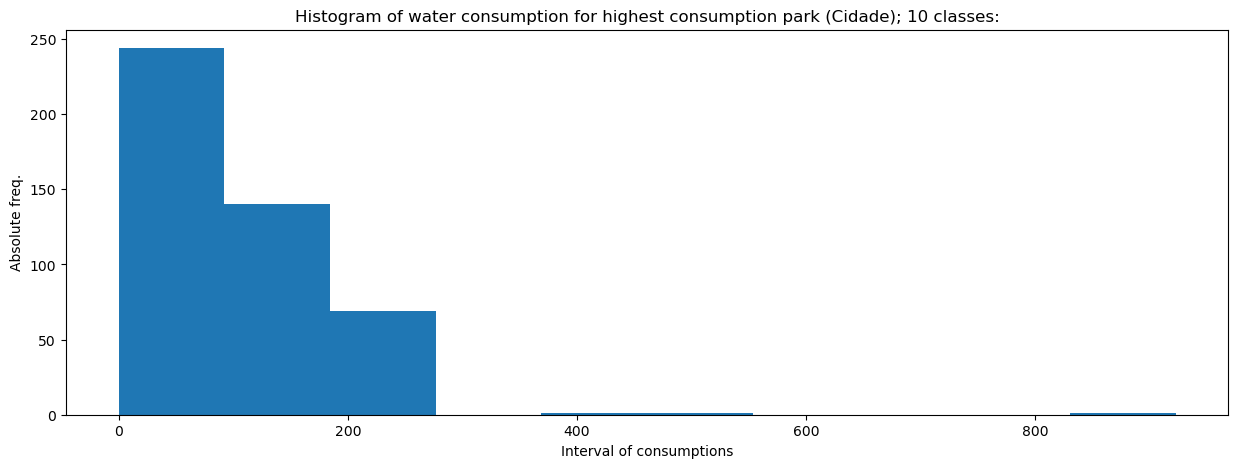

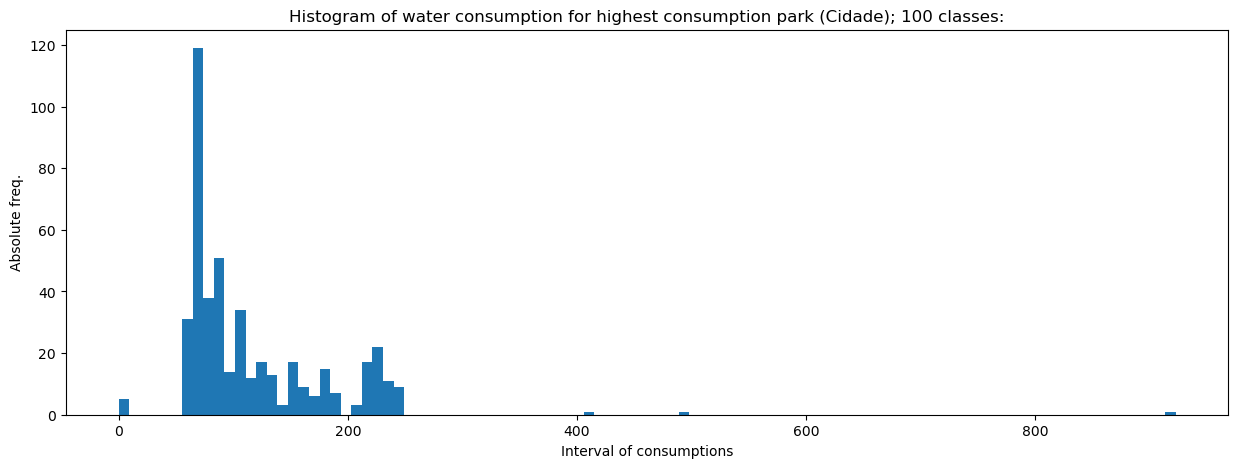

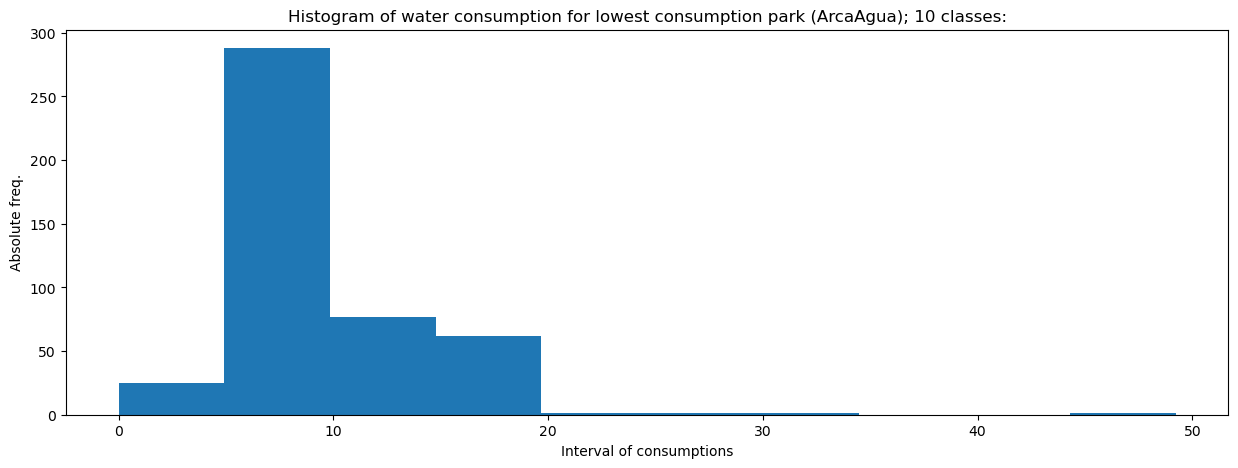

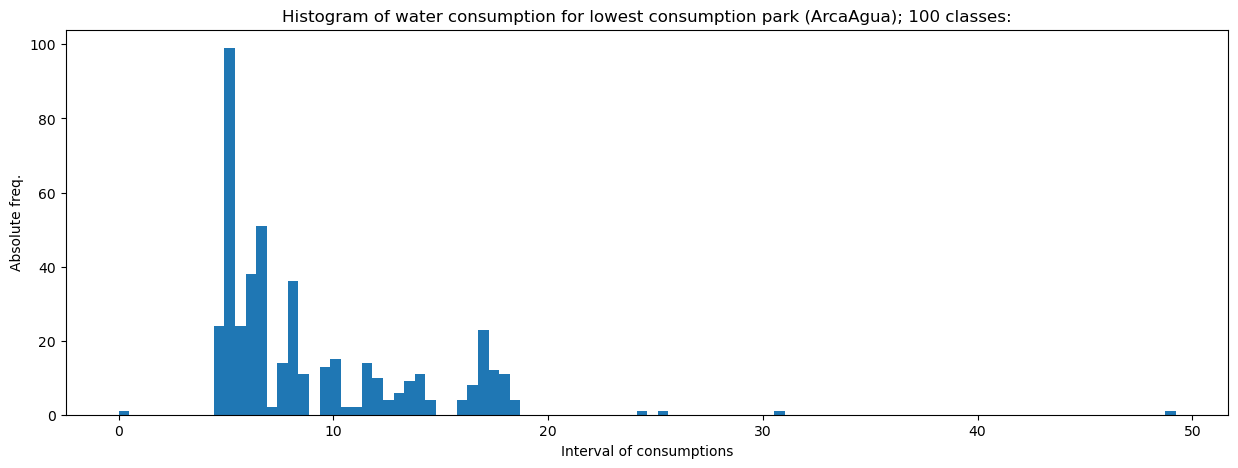

In [4]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
from scipy import stats


RELABS_FREQ_TABLE_NUM_CLASSES = 5


# Create dataframe from CSV
# ==================================================
dataframe = pd.read_csv('water_consumption.csv', sep=';', decimal=',')

# Find witch park has the day with highest and
# lowest non null water consumption
# ==================================================
nonnull_df = dataframe[dataframe['Consumption'] > 0.0]

max_consumption_idx = nonnull_df['Consumption'].idxmax()
key_highest = dataframe.iloc[max_consumption_idx]['Park']

min_consumption_idx = nonnull_df['Consumption'].idxmin()
key_lowest = dataframe.iloc[min_consumption_idx]['Park']

print(f'Park with day of highest water consumption: {key_highest}')
print(f'Park with day of lowest water consumption: {key_lowest}')
print()

dataframe_h = dataframe[dataframe['Park'] == key_highest]
dataframe_l = dataframe[dataframe['Park'] == key_lowest]

consumptions_h = dataframe_h['Consumption'].to_list()
consumptions_l = dataframe_l['Consumption'].to_list()

# --- Mean, median, stdev, skew ---
# --------------------------------------------------
mean_h = st.mean(consumptions_h)
mean_l = st.mean(consumptions_l)
median_h = st.median(consumptions_h)
median_l = st.median(consumptions_l)
stdev_h = st.stdev(consumptions_h)
stdev_l = st.stdev(consumptions_l)
skew_h = stats.skew(consumptions_h)
skew_l = stats.skew(consumptions_l)

table_data = [
    [ 'Mean',                     mean_h,   mean_l   ],
    [ 'Median',                   median_h, median_l ],
    [ 'Standard deviation',       stdev_h,  stdev_l  ],
    [ 'Co-efficient of skewness', skew_h,   skew_l   ]
]
print('Mean, median, standard deviation, and co-efficient of skewness:')
print(tabulate(
    table_data, 
    headers=[' ', key_highest + ' (Highest)', key_lowest + ' (Lowest)'],
    tablefmt='fancy_grid',
    numalign='right',
    floatfmt='.4f'))
print()


def calc_freq_abs(values, class_lower, class_upper, max):
    r = 0
    for v in values:
        if class_upper != max:
            if v >= class_lower and v < class_upper:
                r += 1
        else:
            if v >= class_lower and v <= class_upper:
                r += 1
    return r


def render_relative_and_absolute_frequency_table(tb_title, consumptions):
    min = np.min(consumptions)
    max = np.max(consumptions)
    total_amplitude = max - min
    interval_amplitude = int(np.ceil(total_amplitude / RELABS_FREQ_TABLE_NUM_CLASSES))
    
    table_data = []
    klass = min
    for i in range(RELABS_FREQ_TABLE_NUM_CLASSES):
        class_lower = klass
        class_upper = klass + interval_amplitude
        
        freq_abs = calc_freq_abs(consumptions, class_lower, class_upper, max)
        freq_rel = freq_abs / len(consumptions)
        
        table_data.append([
            str(class_lower) + '-' + str(class_upper),
            freq_abs,
            str(f'{freq_rel * 100:.4f}') + ' %'
        ])
        
        klass += interval_amplitude
        
    print(tb_title)
    print(tabulate(
        table_data, 
        headers=['Water consumption (m3)', 'Absolute freq.', 'Relative freq.'],
        tablefmt='fancy_grid',
        numalign='right',
        floatfmt='.4f'))
    print()


render_relative_and_absolute_frequency_table(
    key_highest + ' (Highest consumption) Frequency table:', consumptions_h)
render_relative_and_absolute_frequency_table(
    key_lowest + ' (Lowest consumption) Frequency table:', consumptions_l)

iqr_h = stats.iqr(consumptions_h)
iqr_l = stats.iqr(consumptions_l)

outlier_bounds_h = [iqr_h * -1.5, iqr_h * 1.5]
outlier_bounds_l = [iqr_l * -1.5, iqr_l * 1.5]


def count_outliers(data, median, outlier_bounds):
    count = 0
    for value in data:
        diff = value - median
        if diff > outlier_bounds[1] or diff < outlier_bounds[0]:
            count += 1
    return count


outliers_count_h = count_outliers(consumptions_h, median_h, outlier_bounds_h)
outliers_count_l = count_outliers(consumptions_l, median_l, outlier_bounds_l)

table_data = [
    [key_highest + ' (Highest)', median_h, iqr_h, outliers_count_h],
    [key_lowest + ' (Lowest)',   median_l, iqr_l, outliers_count_l]
]

print('Outliers (Values that deviate from the median by more than 1.5 times the interquartile range):')
print(tabulate(
    table_data, 
    headers=['Park', 'Median', 'IQR', 'Outliers count'],
    tablefmt='fancy_grid',
    numalign='right',
    floatfmt='.4f'))
print()


def render_histogram(title, consumptions, num_classes):
    plt.figure(figsize=(15, 5))
    plt.title(title)
    plt.xlabel('Interval of consumptions')
    plt.ylabel('Absolute freq.')
    plt.hist(consumptions, bins=num_classes)
    plt.show()
    print()

render_histogram(
    'Histogram of water consumption for highest consumption park (' + key_highest + '); 10 classes:', consumptions_h, 10)
render_histogram(
    'Histogram of water consumption for highest consumption park (' + key_highest + '); 100 classes:', consumptions_h, 100)
render_histogram(
    'Histogram of water consumption for lowest consumption park (' + key_lowest + '); 10 classes:', consumptions_l, 10)
render_histogram(
    'Histogram of water consumption for lowest consumption park (' + key_lowest + '); 100 classes:', consumptions_l, 100)





## Código e resultados US10

Neste estudo são analisadas as escolhas dos utilizadores de um determinado parque, em relação aos equipamentos utilizados pelos mesmos. De seguida, é feita análise estatística dos mesmos sob a forma de gráfico circular para melhor compreensão de possíveis investimentos.

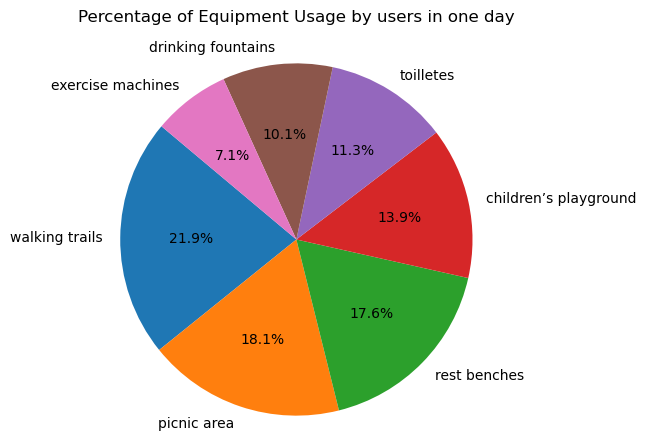

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler ficheiro CSV
df = pd.read_csv("EquipmentUsed.csv") 

# Manipular ficheiro CSV
equipment_counts = df['Equipment'].value_counts() # Contar numero de vezes que cada equipamento é seleccionado no ficheiro csv

# Gráfico

plt.figure(figsize=(5, 5)) # Define tamanho do gráfico
plt.pie(equipment_counts, labels=equipment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Equipment Usage by users in one day\n')
plt.axis('equal')  # Garante que o gráfico seja circular
plt.show()

## Código e resultados US11

#### 11.1)

Os tipos de variáveis são:

Pergunta 1 - Quantitativa contínua por ser numérica e as idades se apresentarem em intervalos reais.

Pergunta 2 - Qualitativa por indicar uma caracteristica não numérica.

Pergunta 3 - Quantitativa discreta por ser numérica e representar um conjunto finito ou infinito numerável de valores.

Para cada faixa etária, necessitamos de contar o número total de utilizadores e verificar aqueles que responderam que vão recomendar o parque. Com estes dados podemos indicar, em percentagem, a proporção de utilizadores que recomenda o parque utilizando a seguinte formula:

#### 11.2)

$$
Percentagem_{\text{recomenda}} = \left( \frac{Utilizadores_{\text{recomendam}}}{Utilizadores_{\text{total}}} \right) \times 100\
$$

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

#Criar a tabela que vai receber a informação apenas com os cabeçalhos
dados = pd.DataFrame(columns=["Escalao" , "TotalUsers" , "UsersThatRecomend" , "Proportion"])

#ler informação e gerar objeto
file_path = "Inquiry.csv"
data = pd.read_csv(file_path,sep=";")


# print('--------------------------- readed data --------------------------------------')

# print()

# print(data)
# print()
contador = 0
for c in range (1,4,1):
#     print('------------------------------------------------------------------------------')
#     print(f'                                 Escalao: {c}                                    ')
#     print()

# filtrar os dados para a faixa etária 
    filtered_data = data[data['Escalao'] == c]
    #     print(filtered_data)
    #     print(filtered_data.describe())

# verificar o numero total de utilizadores da faixa etária lendo a primeira célula que tem esse valor
    total_age = filtered_data.shape[0]
    #     print(f"Total people in Escalao {c}:", total_age)

# filtrar os dados para a faixa etária e que recomendam a utilização do parque
    filtered_data2 = data[(data['Escalao'] == c) & (data['Y/N'] == 'Y')]
    #     print(filtered_data2)
    #     print(filtered_data2.describe())

# verificar o numero total de utilizadores da faixa etária que recomendam o parque
    total_age_recomend = filtered_data2.shape[0]
    #     print(f"Total people in Escalao {c} that recomend the park:", total_age_recomend)

# cálculo da proporção
    prop = (total_age_recomend/total_age)*100
    #     print(f'the proporcion of users of escalao {c} that recomend the park are {prop} %')
    #     print()

# Preencher a tabela dos dados    
    dados.loc[contador] = [c, total_age, total_age_recomend, prop]
    contador += 1
     


    
# print()
# # print(dados)
# # print()

# Formatação dos dados para 2 casas decimais e para inteiros
dados_formatados = dados.copy()
dados_formatados['Proportion'] = dados_formatados['Proportion'].round(2)
dados_formatados[['Escalao', 'TotalUsers', 'UsersThatRecomend']] = dados_formatados[['Escalao', 'TotalUsers', 'UsersThatRecomend']].astype(int)

    # print(dados_formatados)
    # print()

print(tabulate(
    dados_formatados, 
    headers=['Escalao', 'TotalUsers (Un)', 'UsersThatRecomend (Un)', 'Proportion (%)'],
    tablefmt="fancy_grid",
    showindex=False,
    numalign='center'
))


print()




╒═══════════╤═══════════════════╤══════════════════════════╤══════════════════╕
│  Escalao  │  TotalUsers (Un)  │  UsersThatRecomend (Un)  │  Proportion (%)  │
╞═══════════╪═══════════════════╪══════════════════════════╪══════════════════╡
│     1     │        131        │            62            │      47.33       │
├───────────┼───────────────────┼──────────────────────────┼──────────────────┤
│     2     │        182        │            99            │       54.4       │
├───────────┼───────────────────┼──────────────────────────┼──────────────────┤
│     3     │        187        │            85            │      45.45       │
╘═══════════╧═══════════════════╧══════════════════════════╧══════════════════╛




------------------------------------------------------------------------------
                                 Escalao: 1                                    

           Visits
count  131.000000
mean     3.381679
std      1.764862
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      6.000000
median = 3.0

------------------------------------------------------------------------------
                                 Escalao: 2                                    

           Visits
count  182.000000
mean     4.417582
std      2.298527
min      1.000000
25%      2.000000
50%      5.000000
75%      6.000000
max      8.000000
median = 5.0

------------------------------------------------------------------------------
                                 Escalao: 3                                    

           Visits
count  187.000000
mean     6.502674
std      3.296095
min      1.000000
25%      4.000000
50%      7.000000
75%      9.000000
max     12.000000
media

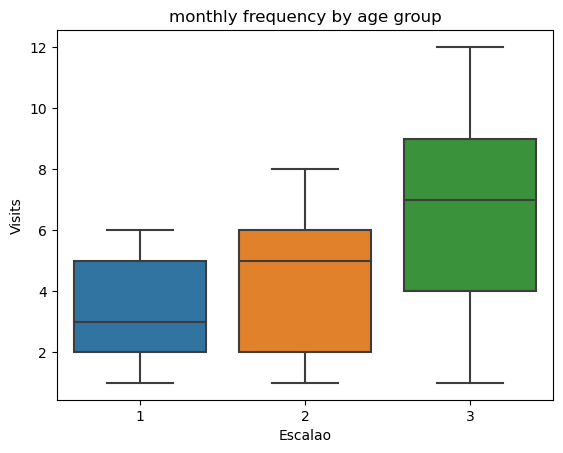

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Nota: Necessita de correr a 11.2 primeiro

# deixa cair a coluna das recomendações
norec = data.drop(columns = ['Y/N'])
    # print(norec)
print()

# imprime os dados utilizados no boxplot para cada escalão
for c in range (1,4,1):
    print('------------------------------------------------------------------------------')
    print(f'                                 Escalao: {c}                                    ')
    print()
    
    filt_norec = norec[norec['Escalao'] == c]
    just_visits = filt_norec.drop(columns = ['Escalao'])
    print(just_visits.describe())
    print(f'median = {np.median(just_visits)}')
    print()



print()

# imprime o boxplot usando o seaborn
sns.boxplot(
    x = "Escalao",
    y = "Visits",
    data=norec
)
plt.title("monthly frequency by age group")

plt.show()


## Análise e interpretação 

#### US09 - Consumo de água mensal

Através dos dados apresentados pelo gráfico de barras gerado, podemos concluir que os meses em que existe um maior consumo de água são os meses mais quentes do ano: junho, julho e agosto sendo que começa a existir um acréscimo de consumo logo durante os meses de abril e maio e um decréscimo a partir do mês de setembro.

#### US09 - Média de consumo de água mensal

Podemos concluir que o parque da cidade apresenta um consumo médio de água muito superior aos outros parques, provavelmente relacionado com as duas dimensões e características. Podemos também observar que o parque Arca de Água tem um consumo médio de água bastante inferior aos outros parques e que os parques Oriental e São Roque apresentam um idêntico consumo médio de água.

#### US09 - Comparação entre os parques com o dia de maior e menor consumo

Podemos concluir que existe uma grande diferença entre os parques selecionados relativamente ao consumo de água, sendo que o parque com o dia de maior consumo apresenta um consumo que água que é mais de 10 vezes superior ao parque com o dia de menor consumo de água.


#### US10 - Equipamentos utilizados num dia

Pela análise do gráfico é possível concluir que das escolhas dos utilizadores naquele dia, a maioria utilizou os trilhos de caminhada, num total de 21,3%, o que sugere que este equipamento é popular neste parque em específico. Outro equipamento também muito utilizado, num total de 18,1% são as áreas de piquenique, o que sugere que este parque tem um ambiente propício ao convívio entre famílias e/ou amigos. Com 17,6%, os bancos de descanso foram seleccionados por 176 utilizadores, o que significa que muitos utilizadores utilizam este parque para descansar ao ar livre. Com 139 seleções, o parque infantil também é bastante popular o que sugere uma presença significativa de famílias com crianças neste parque. Esta utilização mais baixa pode estar relacionada com o facto de ser um equipamento apenas utilizado por utilizadores com crianças. Com 11,3%  as casas de banho também são importantes para os utilizadores do parque, tornando-se assim essenciais em qualquer área recreativa. Contudo, este valor é relativamente baixo quando comparado com outros, o que pode sugerir um mau estado de utilização/limpeza das mesmas, entre outros motivos. Com 101 seleções, as fontes de água são outra comodidade valorizada pelos utilizadores, especialmente em atividades ao ar livre. A baixa utilização pode estar relacionada com o facto dos utilizadores utilizarem a própria água. Por fim, o equipamento menos utilizado foram as máquinas de exercicio, com apenas 7,1%. Esta baixa utilização pode estar relacionada com as mais variadas causas, mas podemos apontar algumas possíveis como mau estado das mesmas, número insuficiente face ao número de utilizadores propensos a utilizá-las, entre outros.

Com esta análise, o GSM pode verificar quais são os equipamentos mais populares e que requerem uma manutenção e melhoria constantes para uma maior satisfação dos utilizadores.
É possível também verificar que os utilizadores valorizam áreas de entretenimento, mas também comodidades básicas como casas de banho e fontes de água. Esta informação é valiosa para o GSM de forma a priorizar a manutenção dessas comodidades.
Com base na popularidade dos diferentes equipamentos, o GSM pode direcionar investimentos e recursos para áreas específicas que são mais valorizadas pelos usuários - melhorias nos trilhos para caminhadas; expansão das áreas de piquenique;aumento do número de bancos de descanso.

Esta monitorização das preferências dos utilizadores ao longo do tempo pode ajudar o GSM a adaptar as suas estratégias e investimentos para corresponder às necessidades em constanre mudança da comunidade que frequenta o parque.
 
#### US11.2  

Após análise dos resultados podemos afirmar que a faixa etária com maior percentagem de utilizadores que recomendam a utilização do parque é a do escalão 2, ou seja, dos 16 aos 65 anos.

#### US11.3 

Escalão 1: A mediana posiciona-se nas 3 visitas por mês. O 1º quartil localiza-se nas 2 visitas e o 3º quartil em 5 visitas. Isso demonstra que a maioria dos utilizadores tem uma frequência de visita mensal entre 2 e 5. O facto de a mediana e o 1º quartil se encontrarem mais próximos do que a mediana e o 3º quartil  indica que a distribuição dos dados está deslocada à esquerda, ou seja os valores mais baixos estão mais concentrados do que os valores mais altos.  
A amplitude interquartil é 3 (3º quartil - 1º quartil).

Escalão 2: Aqui a mediana situa-se nas 5 visitas por mês. O 1º quartil localiza-se nas 2 visitas e o 3º quartil em 6 visitas. Os utilizadores no escalão 2 visitam mais frequentemente o parque em comparação com o escalão 1. Aqui a mediana e o 3º quartil encontram-se mais próximos o que indica que a distribuição dos dados está deslocada à direita, ou seja os valores mais altos que a mediana estão mais concentrados.
A amplitude interquartil é 4 (6 - 2), indicando que a variação do numero de visitas é um pouco maior do que no escalão 1.

Escalão 3: A mediana é de 7 visitas por mês, a mais alta entre os 3 escalões. O 1º quartil localiza-se nas 4 visitas e o 3º quartil em 9 visitas, podemos então afirmar que este é o escalão em que os utilizadores mais frequentemente visitam o parque. Aqui a distância da mediana a cada um dos quartis é relativamente próxima pelo que podemos considerar a distribuição dos dados simétrica (apesar de tender um pouco para a direita). 
A amplitude interquartil é 5 (9 - 4) ,ou seja, este escalão é o que apresenta maior dispersão no número de visitas.

## Contribuição de cada elemento do grupo

André Alexandre Magalhães Azevedo – 1230932 - 20%

Carlos Miguel Pereira Coelho - 1221808 - 20%

Miguel Ângelo Malheiro Lopes – 1222183 - 20%

Rui Gabriel Ribeiro Margarido – 1230420 - 20%

Tiago Leal Ferreira de Sá – 1201925 - 20%